<a href="https://colab.research.google.com/github/shannnu30/CODSOFT/blob/main/CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection  import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from sklearn.cluster import KMeans

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data= pd.read_csv('IRIS.csv')

In [ ]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.isna().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
Species = data['species'].value_counts().reset_index()

In [ ]:
Species

,species,count
0,Iris-setosa,50
1,Iris-versicolor,50
2,Iris-virginica,50


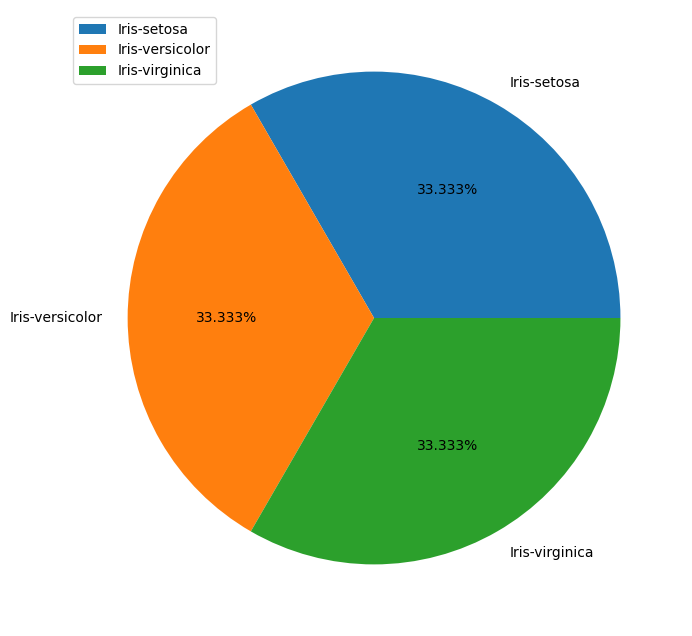

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(Species['count'],labels=['Iris-setosa','Iris-versicolor','Iris-virginica'],autopct='%1.3f%%',explode=[0,0,0])
plt.legend(loc='upper left')
plt.show()

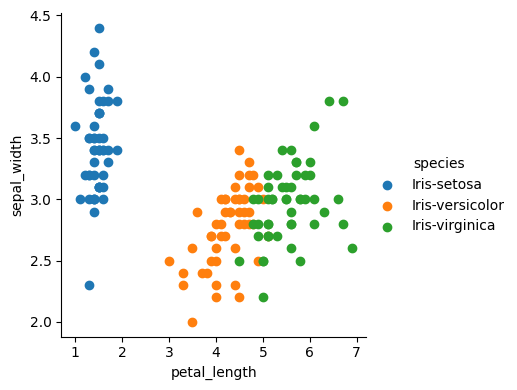

In [ ]:
#Scatter plot of different species
sns.FacetGrid(data, hue ='species', height = 4).map(plt.scatter,"petal_length","sepal_width").add_legend()
plt.show()

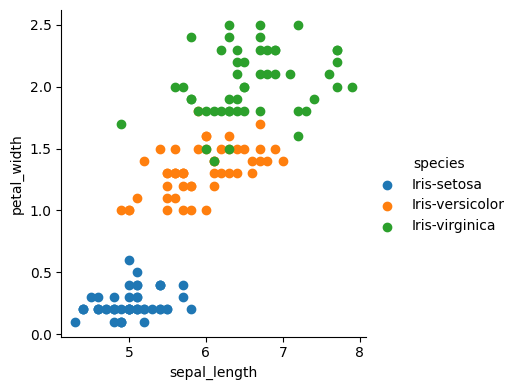

In [ ]:
#Scatter plot of different species
sns.FacetGrid(data, hue ='species', height = 4).map(plt.scatter,"sepal_length","petal_width").add_legend()
plt.show()

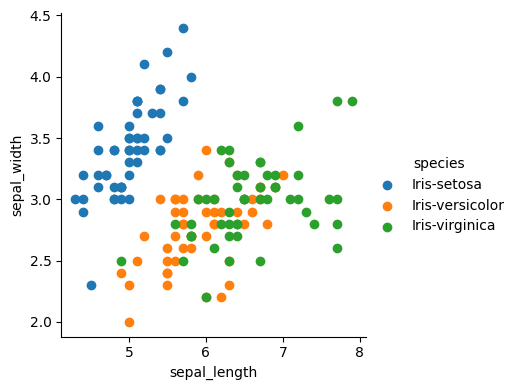

In [ ]:
#Scatter plot of different species
sns.FacetGrid(data, hue ='species', height = 4).map(plt.scatter,"sepal_length","sepal_width").add_legend()
plt.show()

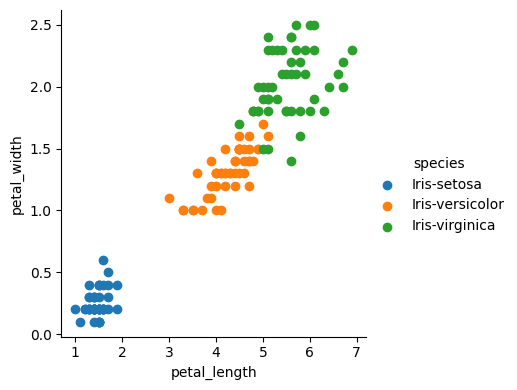

In [ ]:
#Scatter plot of different species
sns.FacetGrid(data, hue ='species', height = 4).map(plt.scatter,"petal_length","petal_width").add_legend()
plt.show()

In [ ]:
fig = px.scatter_3d(data, x='sepal_length', y='petal_width', z='petal_length', color='species')
fig.show()

In [ ]:
X = data.drop('species', axis =1)
y = data['species']

In [ ]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

X

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [ ]:
y

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [ ]:
encoder = LabelEncoder()

y = encoder.fit_transform(y)

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [ ]:
def evaluate(model):
   model.fit(X_train,y_train)
   pre = model.predict(X_test)

   accuracy = accuracy_score(pre,y_test)

   sns.heatmap(confusion_matrix(pre,y_test),annot=True)
   print(model)
   print('Accuracy : ',accuracy)

In [ ]:
model_LR = LogisticRegression()

LogisticRegression(C=1000.0, random_state=42)
Accuracy :  1.0


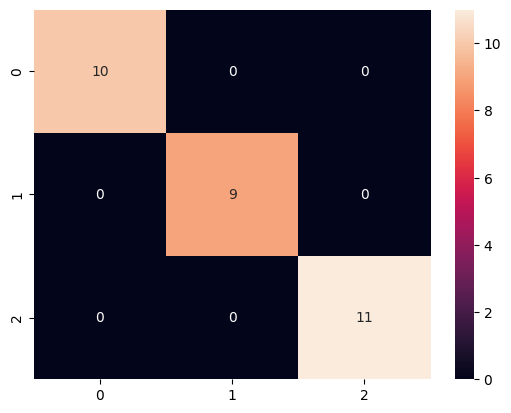

In [ ]:
lsr_best = LogisticRegression(penalty='l2',C=1000.0,random_state = 42)
lsr_clf = lsr_best.fit(X_train,y_train)
evaluate(lsr_clf)

In [ ]:
#using knn algorithm
model_KNN = KNeighborsClassifier()

In [ ]:
k_range = np.arange(1, 20, 2)
scores = [] #to store cross val score for each k
for k in k_range:
   model_KNN  = KNeighborsClassifier(n_neighbors=k)
   model_KNN .fit(X_train,y_train)
   score = cross_val_score(model_KNN , X_train, y_train, cv=3, n_jobs = -1)
   scores.append(score.mean())

#Storing the mean squared error to decide optimum k
mse = [1-x for x in scores]

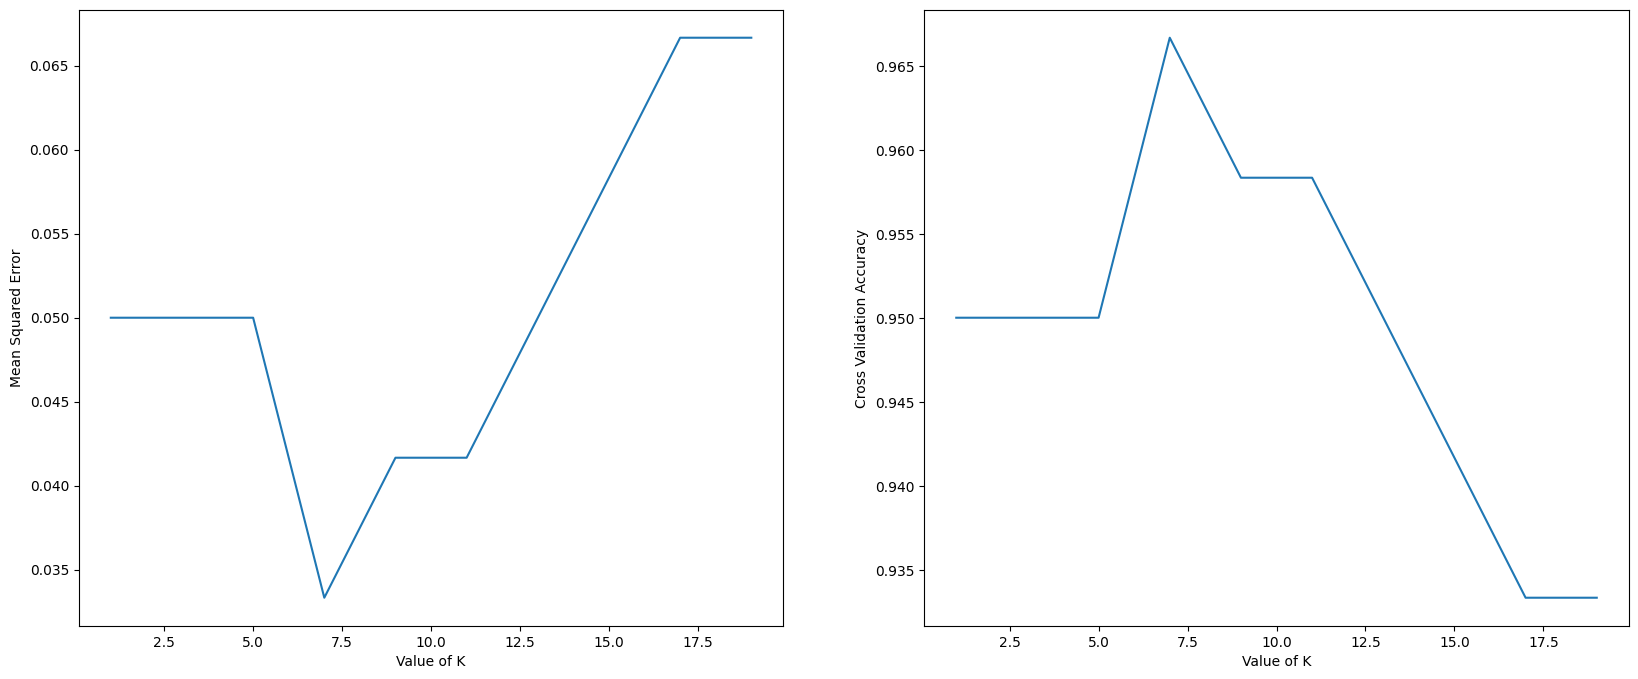

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(121)
sns.lineplot(x=k_range,y=mse,markers=True,dashes=False)
plt.xlabel("Value of K")
plt.ylabel("Mean Squared Error")
plt.subplot(122)
sns.lineplot(x=k_range,y=scores,markers=True,dashes=False)
plt.xlabel("Value of K")
plt.ylabel("Cross Validation Accuracy")

plt.show()

KNeighborsClassifier(n_neighbors=7)
Accuracy :  1.0


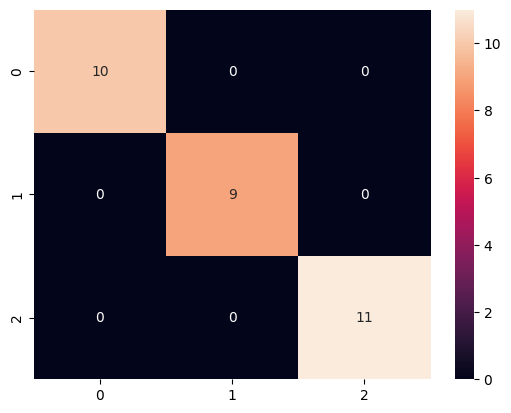

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)

knn_clf = knn.fit(X_train,y_train)

evaluate(knn_clf)

In [ ]:
#using random forest algorithm
model_RFC = RandomForestClassifier()

RandomForestClassifier(max_depth=9, n_estimators=50)
Accuracy :  1.0


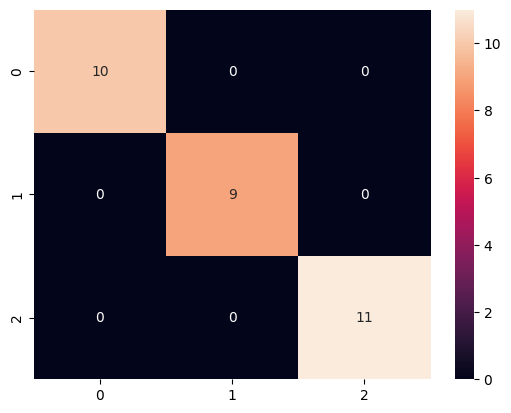

In [ ]:
rf = RandomForestClassifier(max_depth=9, n_estimators=50)
RFC_clf = rf.fit(X_train,y_train)

evaluate(RFC_clf)

In [ ]:
#using support vector machine algorithm
model_SVM = SVC()

SVC()
Accuracy :  1.0


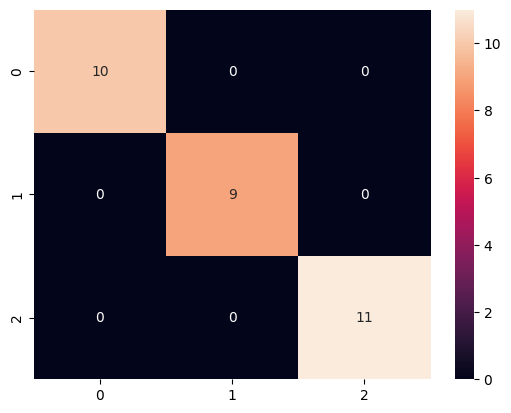

In [ ]:
svc = SVC()
svc_clf = svc.fit(X_train, y_train)
evaluate(svc_clf)

In [ ]:
# using Decision Tree algorithm
model_DT = DecisionTreeClassifier()

SVC()
Accuracy :  1.0


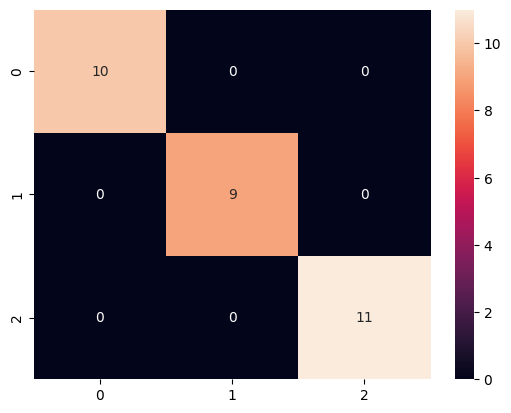

In [ ]:
DT = model_DT.fit(X_train, y_train)
evaluate(svc_clf)

In [ ]:
#using neural network algorithm
model_ANN = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),

    Dense(64, activation='relu'),

    Dense(32, activation='relu'),

    Dense(16, activation='relu'),

    Dense(8, activation='relu'),

    Dense(3, activation='softmax')
])

model_ANN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_ANN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,667 (45.57 KB)

 Trainable params: 11,667 (45.57 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model_ANN.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 374ms/step - accuracy: 0.0456 - loss: 1.0960 - val_accuracy: 0.3333 - val_loss: 1.0897
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.1771 - loss: 1.0832 - val_accuracy: 0.5833 - val_loss: 1.0816
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.4310 - loss: 1.0684 - val_accuracy: 0.4167 - val_loss: 1.0766
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6029 - loss: 1.0579 - val_accuracy: 0.5000 - val_loss: 1.0724
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.7292 - loss: 1.0487 - val_accuracy: 0.5000 - val_loss: 1.0655
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6484 - loss: 1.0347 - val_accuracy: 0.5000 - val_loss: 1.0567
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7083 - loss: 1.0105 - val_accuracy: 0.5000 - val_loss: 1.0489
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6758 - loss: 1.0057 - val_accuracy: 0.5000 - val_loss: 1.0387

In [ ]:
#Finding the optimum number of clusters for k-means classification
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

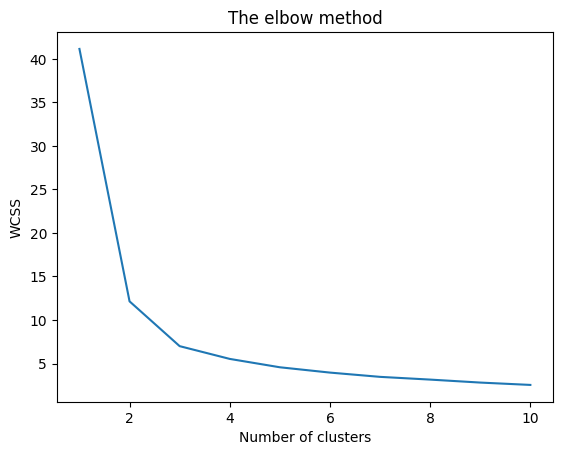

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()